# Introduction

Cluster analysis aims at partitioning the data into groups of closely related instances so that instances that belong to the same cluster are more similar

# K-means Clustering
K-means clustering algorithm represents each cluster by its corresponding

## Example
We use a toy dataset to demonstrate this. It is movie-review data

In [1]:
ratings = [['John', 5, 5, 2, 1], ['Mary', 4, 5,3, 3], ['Bob', 4, 4, 4,3], ['Lisa', 2,2,4,5], ['Lee', 1,2,3,4], ['Harry', 2,1,5,5]]

In [2]:
ratings

[['John', 5, 5, 2, 1],
 ['Mary', 4, 5, 3, 3],
 ['Bob', 4, 4, 4, 3],
 ['Lisa', 2, 2, 4, 5],
 ['Lee', 1, 2, 3, 4],
 ['Harry', 2, 1, 5, 5]]

In [3]:
titles=['User', 'Jaws', 'Star Wars', 'Exorcist','Omen']

In [4]:
titles

['User', 'Jaws', 'Star Wars', 'Exorcist', 'Omen']

In [5]:
import pandas as pd

In [6]:
movies = pd.DataFrame(ratings, columns=titles)

In [7]:
movies

,User,Jaws,Star Wars,Exorcist,Omen
0,John,5,5,2,1
1,Mary,4,5,3,3
2,Bob,4,4,4,3
3,Lisa,2,2,4,5
4,Lee,1,2,3,4
5,Harry,2,1,5,5


- jaws - action movie (thriller)
- Star Wars - action movie (Sci-Fi)
- Omen - Horror movie
- Exorcist - Horror movie

As per the dataset, the first few users like action movies but dislike horror movies. On ther hand, the last three users like horror movies but dislike action movies.

Disclaimer : for this example, we classify Star Wars and Jaws as action movies

we start with k = 2, this is unsupervised learning

In [8]:
data = movies.drop(['User'], axis=1)

In [9]:
data

,Jaws,Star Wars,Exorcist,Omen
0,5,5,2,1
1,4,5,3,3
2,4,4,4,3
3,2,2,4,5
4,1,2,3,4
5,2,1,5,5


In [10]:
from sklearn import cluster

In [11]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)

In [12]:
k_means

KMeans(max_iter=50, n_clusters=2, random_state=1)

In [13]:
k_means.fit(data)

KMeans(max_iter=50, n_clusters=2, random_state=1)

In [14]:
labels = k_means.labels_

In [15]:
movies

,User,Jaws,Star Wars,Exorcist,Omen
0,John,5,5,2,1
1,Mary,4,5,3,3
2,Bob,4,4,4,3
3,Lisa,2,2,4,5
4,Lee,1,2,3,4
5,Harry,2,1,5,5


In [16]:
pd.DataFrame(labels, index=movies.User, columns=['Cluster ID'])

,Cluster ID
User,
John,1
Mary,1
Bob,1
Lisa,0
Lee,0
Harry,0


the k-means has assigned the first three users to cluster=1, anf the last three users to cluster=0. This is very consistent with what we expected. We can also display the centroid of each of the two clusters.

In [17]:
centroids = k_means.cluster_centers_

In [18]:
centroids

array([[1.66666667, 1.66666667, 4.        , 4.66666667],
       [4.33333333, 4.66666667, 3.        , 2.33333333]])

In [20]:
pd.DataFrame(centroids, columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.333333


Observe that cluster 1 has higher ratings for horror movies. 
Cluster 0 has higher ratings for action movies.
- We need to apply the K-means algorithm to other users.

In [21]:
import numpy as np

In [58]:
testData = np.array([[4,5,1,2], [3,2,4,4], [2,3,4,1],[3,2,3,3], [5,4,1,4], [5,3,4,4]])

In [59]:
testData

array([[4, 5, 1, 2],
       [3, 2, 4, 4],
       [2, 3, 4, 1],
       [3, 2, 3, 3],
       [5, 4, 1, 4],
       [5, 3, 4, 4]])

In [60]:
labels = k_means.predict(testData)

In [61]:
labels

array([1, 0, 1, 0, 1, 1])

the output above means user 1 in the testdata array bellongs to cluster 1, second to cluster 0, etc.

In [62]:
labels.shape

(6,)

In [63]:
labels = labels.reshape(-1,1)

In [64]:
labels

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [65]:
usernames = np.array(['Paul', 'Maina', 'Otieno', 'Sarah', 'Lizzy', 'Joe'])

In [66]:
usernames

array(['Paul', 'Maina', 'Otieno', 'Sarah', 'Lizzy', 'Joe'], dtype='<U6')

In [67]:
usernames = usernames.reshape(-1,1)

In [68]:
usernames

array([['Paul'],
       ['Maina'],
       ['Otieno'],
       ['Sarah'],
       ['Lizzy'],
       ['Joe']], dtype='<U6')

In [69]:
cols = movies.columns.tolist()

In [70]:
cols

['User', 'Jaws', 'Star Wars', 'Exorcist', 'Omen']

In [71]:
cols.append('Cluster ID')

In [72]:
cols

['User', 'Jaws', 'Star Wars', 'Exorcist', 'Omen', 'Cluster ID']

In [73]:
newusers = pd.DataFrame(np.concatenate((usernames, testData,labels), axis=1), columns=cols)

In [74]:
newusers

,User,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,Paul,4,5,1,2,1
1,Maina,3,2,4,4,0
2,Otieno,2,3,4,1,1
3,Sarah,3,2,3,3,0
4,Lizzy,5,4,1,4,1
5,Joe,5,3,4,4,1


In [75]:
# Selecting the number of clusters. A method called the 'elbow' method.

In [76]:
import matplotlib.pyplot as plt

In [78]:
%matplotlib inline

In [79]:
numClusters = [1,2,3,4,5,6]

In [80]:
#Sum of the squared error
#k_means.inertia_ gives the sum of squared errors
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

C:\Users\25470\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [81]:
numClusters

[1, 2, 3, 4, 5, 6]

In [82]:
SSE

[43.83333333333333, 10.0, 5.0, 2.0, 1.0, 0.0]

Text(0, 0.5, 'SSE')

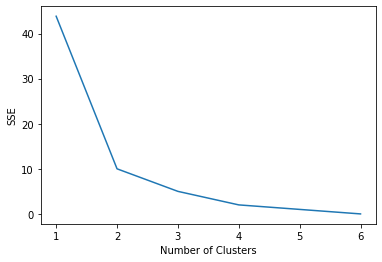

In [84]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')